In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
raw_data = jnp.load("alanine-dipeptide-3x250ns-backbone-dihedrals.npz")
data = jnp.concatenate((raw_data["arr_0"], raw_data["arr_1"], raw_data["arr_2"]))
data

Array([[-2.3586364 ,  0.06086466],
       [-2.7071543 , -0.18707922],
       [-2.3687088 ,  0.04352526],
       ...,
       [-1.3182248 ,  2.8091505 ],
       [-1.3267088 ,  2.5919023 ],
       [-1.2377207 ,  1.9713207 ]], dtype=float32)

In [4]:
# phi = [item[0] for item in data]
# psi = [item[1] for item in data]
phis = data[:, 0]
psis = data[:, 1]
# phis = [phi if phi > 0 else phi + 2*jnp.pi for phi in phis]
# psis = [psi if psi > 0 else psi + 2*jnp.pi for psi in psis]

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_1108/3540053514.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  phifig.show()


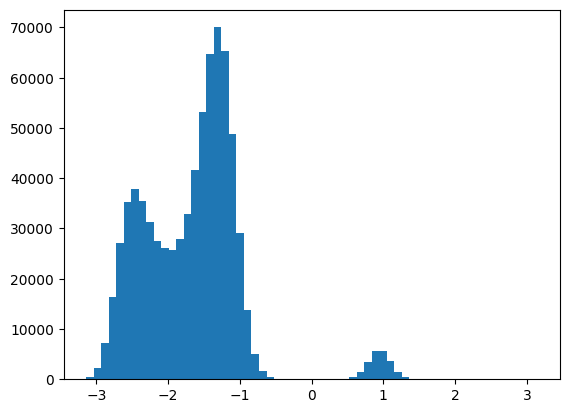

In [8]:
# plt.hist2d(phis, psis, bins=40)
# plt.scatter(phis, psis)
phifig, phiax = plt.subplots()
phiax.hist(phis, bins=60)
phifig.show()

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_1108/2641059251.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  psifig.show()


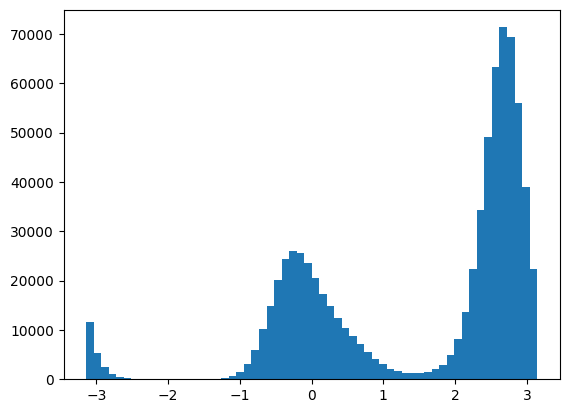

In [9]:
psifig, psiax = plt.subplots()
psiax.hist(psis, bins=60)
psifig.show()

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_1108/137079205.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


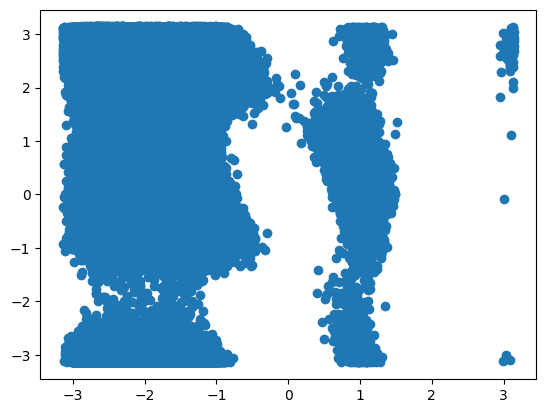

In [36]:
fig, ax = plt.subplots()
ax.scatter(phis, psis)
fig.show()

In [37]:
def get_pdf(data, nxgrid, nygrid):
    xstep = 2*jnp.pi / nxgrid
    ystep = 2*jnp.pi / nygrid
    rounded_data = jnp.floor((data + jnp.pi) / jnp.array([xstep, ystep])).astype(int)
    pdf = [[0 for _ in range(nygrid)] for _ in range(nxgrid)]
    for idx in rounded_data:
        pdf[idx[0]][idx[1]] += 1
    return jnp.array(pdf)
            

In [46]:
nxgrid = 360
nygrid = 360
pdf = get_pdf(data, nxgrid, nygrid)
free_energy = jnp.log(pdf)

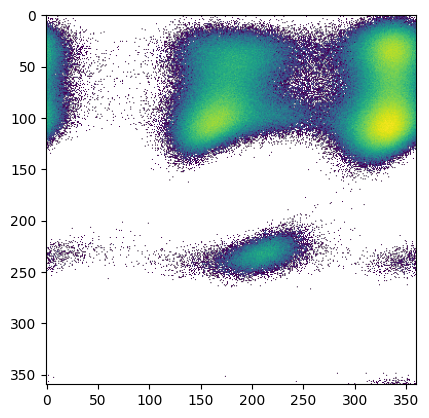

In [47]:
plt.imshow(free_energy)

In [56]:
with open("ala_di_fes.txt", "w") as f:
    f.write("phi psi free_energy\n")
for phi in range(nxgrid):
    for psi in range(nygrid):
        fe = free_energy[phi, psi]
        if (fe != -jnp.inf) and (fe > 1e-8):
            with open("ala_di_fes.txt", "a") as f:
                f.write(f"{phi - 180} {psi - 180} {fe}\n")